### Loading the dataset

In [226]:
# importing libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics as mt

In [5]:
# loading the dataset
df = pd.read_excel("~/Desktop/creditCard.xls",header=1)

In [6]:
# visualizing data and size
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [10]:
# setting ID as index
df = df.set_index('ID')
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


### Pre-processing the dataset

In [11]:
# checking datatypes and null value count
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [21]:
# descriptive statistics of all columns
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [45]:
# changing column name for better readability
df['IsDefaulter'] = df ['default payment next month']
df.drop('default payment next month',axis = 1,inplace = True)

<AxesSubplot:xlabel='IsDefaulter', ylabel='count'>

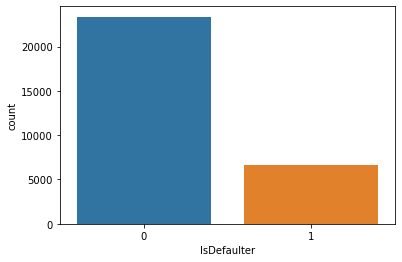

In [29]:
# visualizing target feature count
sns.countplot('IsDefaulter', data = df)
# data is imbalanced

In [34]:
df['SEX'].value_counts()
# 1 is male
# 2 is female

2    18112
1    11888
Name: SEX, dtype: int64

In [35]:
df['EDUCATION'].value_counts()
# education type 5, 6 and 0 have no definition in UCI

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [36]:
# so changing them all to education type 4 which is others
temp = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[temp, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [37]:
df['MARRIAGE'].value_counts()
# marriage type 0 has no definition in UCI

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [38]:
# so changing it to marriage type 3 which is others
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [39]:
# renaming pay_0 to pay_6 as per definition in UCI for better redeability
df.rename(columns={'PAY_0':'RePay_SEPT','PAY_2':'RePay_AUG','PAY_3':'RePay_JUL','PAY_4':'RePay_JUN',
                   'PAY_5':'RePay_MAY','PAY_6':'RePay_APR'},inplace=True)


In [40]:
# renaming bill_amt_1 to bill_amt_6 as per definition in UCI for better redeability
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL',
                   'BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, 
                   inplace = True)


In [41]:
# renaming pay_amt_0 to pay__amt_6 as per definition in UCI for better redeability
df.rename(columns={'PAY_AMT1':'PrevPay_SEPT','PAY_AMT2':'PrevPay_AUG','PAY_AMT3':'PrevPay_JUL',
                   'PAY_AMT4':'PrevPay_JUN','PAY_AMT5':'PrevPay_MAY','PAY_AMT6':'PrevPay_APR'},inplace=True)

In [43]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,RePay_SEPT,RePay_AUG,RePay_JUL,RePay_JUN,RePay_MAY,...,BILL_AMT_MAY,BILL_AMT_APR,PrevPay_SEPT,PrevPay_AUG,PrevPay_JUL,PrevPay_JUN,PrevPay_MAY,PrevPay_APR,default payment next month,IsDefaulter
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1
3,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0
4,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0


In [46]:
y = df['IsDefaulter']
df.drop(['IsDefaulter'], axis = 1,inplace = True)
X = df

In [187]:
# splitting data to train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state = 0)

### Random forest with default parameters

In [231]:
# model building
rf1 = RandomForestClassifier(class_weight='balanced')
rf1_fit = rf1.fit(X_train,y_train)
y_pred_rf1 = rf1_fit.predict(X_test)

In [232]:
print('Accuracy of random forest with default parameters: ',round(accuracy_score(y_pred_rf1,y_test)*100,1))

Accuracy of random forest with default parameters:  81.9


In [233]:
print("Classification report:\n",mt.classification_report(y_test,y_pred_rf1))

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      9408
           1       0.66      0.34      0.45      2592

    accuracy                           0.82     12000
   macro avg       0.75      0.64      0.67     12000
weighted avg       0.80      0.82      0.80     12000



In [213]:
# model building
rf1 = RandomForestClassifier(class_weight='balanced')
rf1_fit = rf1.fit(X_train,y_train)
y_pred_rf1 = rf1_fit.predict(X_test)

In [214]:
print('Accuracy of random forest with default parameters: ', round(accuracy_score(y_pred_rf1,y_test)*100,1))

Accuracy of random forest with default parameters:  81.8


In [230]:
print("Classification report:\n",mt.classification_report(y_test,y_pred_rf1))

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      9408
           1       0.66      0.33      0.44      2592

    accuracy                           0.82     12000
   macro avg       0.75      0.64      0.67     12000
weighted avg       0.80      0.82      0.79     12000



### Random forest with max_depth hyperparameter

In [82]:
# performing grid search CV for max_depth hyperparameter tuning
max_depth = [5, 8, 15, 25, 30]

param_grid = {'max_depth' : max_depth}

clf = GridSearchCV(RandomForestClassifier(class_weight='balanced'),param_grid)

clf.fit(X_train,y_train)

clf_df = pd.DataFrame(clf.cv_results_) # converting results of GridSearchCV to a dataframe

clf_df[['param_max_depth','mean_test_score']] # displaying imp columns


,param_max_depth,mean_test_score
0,5,0.776714
1,8,0.778524
2,15,0.804429
3,25,0.810381
4,30,0.811333


In [223]:
# storing test accuracies
test_score = list(clf_df['mean_test_score'])

In [224]:
# calculating train accuracies
train_score = []

for i in max_depth:
    rf = RandomForestClassifier(class_weight='balanced',max_depth = i)
    rf_fit = rf.fit(X_train,y_train)
    y_pred_rf = rf_fit.predict(X_train)
    train_score.append(accuracy_score(y_pred_rf,y_train))

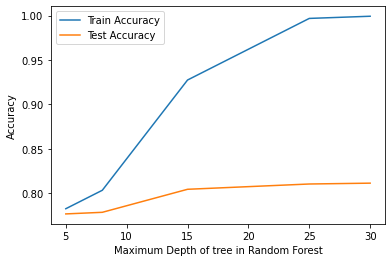

In [225]:
# visualizing
plt.plot(max_depth,train_score, label = "Train Accuracy")
plt.plot (max_depth, test_score,label = "Test Accuracy")
plt.xticks()
plt.legend()
plt.xlabel("Maximum Depth of tree in Random Forest")
plt.ylabel("Accuracy")
plt.show()
# optimum depth of tree from below graph = 15

### Random forest with n_estimators hyperparameter

In [101]:
# performing grid search CV for n_estimators hyperparameter tuning
#[50,100,400,900]
n_estimators = [10,50,100,150,200]

param_grid = {'n_estimators' : n_estimators}

clf = GridSearchCV(RandomForestClassifier(class_weight='balanced'),param_grid,cv = 3)

clf.fit(X_train,y_train)

clf_df = pd.DataFrame(clf.cv_results_) # converting results of GridSearchCV to a dataframe

clf_df[['param_n_estimators','mean_test_score']]


,param_n_estimators,mean_test_score
0,10,0.803381
1,50,0.812571
2,100,0.812095
3,150,0.812381
4,200,0.812905


In [102]:
# storing test accuracies
test_score = list(clf_df['mean_test_score'])

In [103]:
# calculating train accuracies
train_score = []

for i in n_estimators:
    rf = RandomForestClassifier(class_weight='balanced',n_estimators = i)
    rf_fit = rf.fit(X_train,y_train)
    y_pred_rf = rf_fit.predict(X_train)
    train_score.append(accuracy_score(y_pred_rf,y_train))

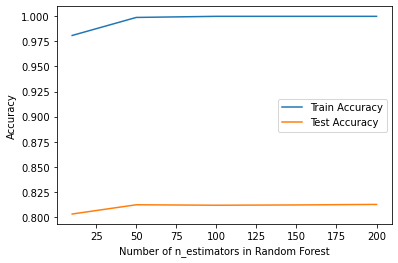

In [104]:
plt.plot(n_estimators,train_score, label = "Train Accuracy")
plt.plot (n_estimators, test_score,label = "Test Accuracy")
plt.xticks()
plt.legend()
plt.xlabel("Number of n_estimators in Random Forest")
plt.ylabel("Accuracy")
plt.show()
# optimum value of n_estimators = 50

### Random forest with more hyperparameters

In [215]:
n_estimators =  [50,100] 
max_depth = [20,35] 
min_samples_leaf = [1,10]  
min_samples_split = [2, 10] 
max_features = [10,20]

param_grid = {'n_estimators' : n_estimators,'max_depth':max_depth,'min_samples_leaf':min_samples_leaf,
              'min_samples_split':min_samples_split,'max_features':max_features}

clf = GridSearchCV(RandomForestClassifier(class_weight='balanced'),param_grid)

clf.fit(X_train,y_train)

clf_df = pd.DataFrame(clf.cv_results_) # converting results of GridSearchCV to a dataframe

clf_df[['param_n_estimators','param_max_depth','param_min_samples_leaf','param_min_samples_split',
        'mean_test_score']]


,param_n_estimators,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_test_score
0,50,20,1,2,0.807611
1,100,20,1,2,0.808611
2,50,20,1,10,0.803222
3,100,20,1,10,0.804833
4,50,20,10,2,0.792889
5,100,20,10,2,0.792944
6,50,20,10,10,0.792389
7,100,20,10,10,0.793444
8,50,20,1,2,0.806944
9,100,20,1,2,0.806556


In [216]:
# best parameters after grid search
print(clf.best_params_)

{'max_depth': 35, 'max_features': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [217]:
# building model with chosen hyperperparameters from grid search cv
rf2 = RandomForestClassifier(class_weight = 'balanced', max_depth = 35, max_features = 20, 
                             min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)
rf2_fit = rf2.fit(X_train,y_train)
y_pred_rf2 = rf2_fit.predict(X_test)

In [218]:
print('Accuracy of random forest classifier with hyperparameter tuning: ',
      round(accuracy_score(y_pred_rf2,y_test)*100,1))

Accuracy of random forest classifier with hyperparameter tuning:  82.1


In [228]:
print("Classification report:\n",mt.classification_report(y_test,y_pred_rf2))

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      9408
           1       0.67      0.34      0.45      2592

    accuracy                           0.82     12000
   macro avg       0.75      0.65      0.67     12000
weighted avg       0.80      0.82      0.80     12000

